In [1]:
import numpy as np
import pandas as pd
import gzip
from rdkit import DataStructs
from rdkit import RDLogger
from rdkit import Chem

RDLogger.DisableLog('rdApp.error')

In [51]:
#supp = Chem.SDMolSupplier('../data/drugbank.sdf')
#drug_bank = [[mol, 'DrugBank'] for mol in supp if mol]

with gzip.open('actives_final.sdf.gz') as sdf:
    supp_actives = Chem.ForwardSDMolSupplier(sdf)
    actives = [[mol, 'actives'] for mol in supp_actives if mol]

with gzip.open('decoys_final.sdf.gz') as sdf:
    supp_decoys = Chem.ForwardSDMolSupplier(sdf)
    decoys = [[mol, 'decoys'] for mol in supp_decoys if mol]

#df_db = pd.DataFrame(drug_bank, columns=['Mol', 'Source'])
df_ac = pd.DataFrame(actives, columns=['Mol', 'Source'])
df_de = pd.DataFrame(decoys, columns=['Mol', 'Source'])

df = pd.concat((df_ac, df_de), ignore_index=True)
df

,Mol,Source
0,<rdkit.Chem.rdchem.Mol object at 0x7fc87a6c44e0>,actives
1,<rdkit.Chem.rdchem.Mol object at 0x7fc87a3f26c0>,actives
2,<rdkit.Chem.rdchem.Mol object at 0x7fc87a3f2760>,actives
3,<rdkit.Chem.rdchem.Mol object at 0x7fc87a3f2800>,actives
4,<rdkit.Chem.rdchem.Mol object at 0x7fc87a3ef3a0>,actives
...,...,...
29121,<rdkit.Chem.rdchem.Mol object at 0x7fc87bf3eb20>,decoys
29122,<rdkit.Chem.rdchem.Mol object at 0x7fc87bf3e4e0>,decoys
29123,<rdkit.Chem.rdchem.Mol object at 0x7fc87bf3e710>,decoys
29124,<rdkit.Chem.rdchem.Mol object at 0x7fc87b2b2d50>,decoys


In [52]:
from rdkit.Chem import rdMolDescriptors

df_mqn = pd.DataFrame((rdMolDescriptors.MQNs_(mol) for mol in df["Mol"]), columns=[*(f"MQN_{x}" for x in range(1,43))])
df_mqn

,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,MQN_8,MQN_9,MQN_10,...,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41,MQN_42
0,20,3,0,0,0,1,0,2,2,1,...,0,0,2,2,0,0,0,0,2,1
1,14,0,0,0,0,1,0,3,4,3,...,0,0,2,2,0,0,0,0,4,2
2,14,0,0,0,0,1,0,3,4,3,...,0,0,2,2,0,0,0,0,4,2
3,14,0,0,0,0,1,0,3,4,3,...,0,0,2,2,0,0,0,0,4,2
4,14,0,0,0,0,1,0,3,4,3,...,0,0,2,2,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29121,23,0,0,0,0,1,0,0,3,2,...,0,0,1,4,0,0,0,0,4,2
29122,23,0,0,0,0,1,0,0,3,2,...,0,0,1,4,0,0,0,0,4,2
29123,22,0,1,0,0,0,0,0,3,2,...,0,0,1,4,0,0,0,0,4,2
29124,20,1,1,0,0,0,0,2,1,1,...,0,0,0,3,0,0,0,0,0,0


In [53]:
# create label column
df_mqn['Label'] = df['Source'].map({'actives': 1, 'decoys': 0})
df_mqn

,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,MQN_8,MQN_9,MQN_10,...,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41,MQN_42,Label
0,20,3,0,0,0,1,0,2,2,1,...,0,2,2,0,0,0,0,2,1,1
1,14,0,0,0,0,1,0,3,4,3,...,0,2,2,0,0,0,0,4,2,1
2,14,0,0,0,0,1,0,3,4,3,...,0,2,2,0,0,0,0,4,2,1
3,14,0,0,0,0,1,0,3,4,3,...,0,2,2,0,0,0,0,4,2,1
4,14,0,0,0,0,1,0,3,4,3,...,0,2,2,0,0,0,0,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29121,23,0,0,0,0,1,0,0,3,2,...,0,1,4,0,0,0,0,4,2,0
29122,23,0,0,0,0,1,0,0,3,2,...,0,1,4,0,0,0,0,4,2,0
29123,22,0,1,0,0,0,0,0,3,2,...,0,1,4,0,0,0,0,4,2,0
29124,20,1,1,0,0,0,0,2,1,1,...,0,0,3,0,0,0,0,0,0,0


In [55]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_mqn.drop(columns=['Label']), df_mqn['Label'], test_size=0.2, random_state=42)

In [66]:
X_train

,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,MQN_8,MQN_9,MQN_10,...,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41,MQN_42
12407,21,0,0,1,0,0,0,0,2,5,...,0,0,2,2,0,0,0,0,2,1
6418,17,2,0,0,0,0,0,2,4,1,...,0,0,1,2,0,0,0,0,0,0
25191,13,0,0,0,0,0,0,4,0,2,...,0,0,0,1,0,0,0,0,0,0
28898,19,0,0,1,0,0,0,1,2,2,...,0,0,1,3,0,0,0,0,4,2
23583,21,0,0,0,0,0,0,2,0,2,...,0,0,1,2,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,27,0,0,0,0,0,0,0,5,2,...,0,0,3,3,0,0,0,0,4,2
5390,16,0,1,0,0,0,0,3,0,2,...,0,0,1,1,0,0,0,0,0,0
860,21,0,0,0,0,0,0,0,0,2,...,0,0,3,3,0,0,0,0,10,5
15795,18,0,0,0,0,0,0,1,4,1,...,0,0,3,1,0,0,0,0,0,0


In [56]:
# do random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

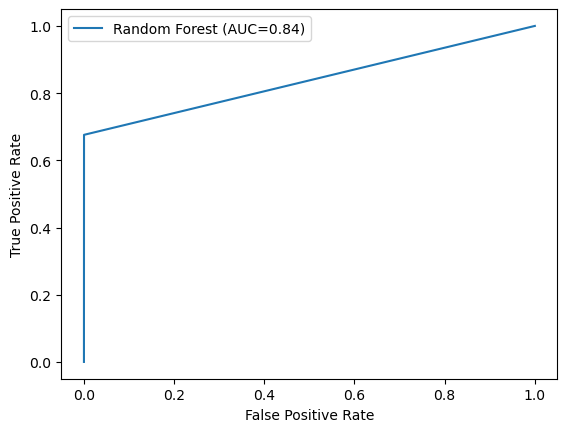

In [57]:

# predict
y_pred = rf.predict(X_test)

# plot roc curve fo classifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'Random Forest (AUC={auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [58]:
# calculate f1 score
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))

0.8032786885245902


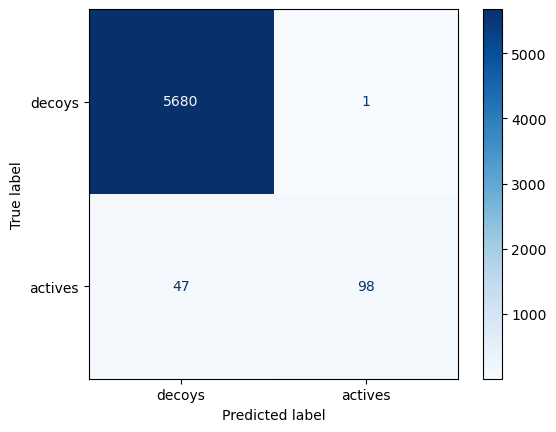

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, display_labels=['decoys', 'actives'])

-----------------------

In [68]:
from rdkit.Chem import AllChem

fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in df["Mol"]]

df_fp = pd.DataFrame(fps, columns=["FP"])

df_fp['Label'] = df['Source'].map({'actives': 1, 'decoys': 0})
df_fp

,FP,Label
0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
...,...,...
29121,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
29122,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
29123,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
29124,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0


In [69]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_fp.drop(columns=['Label']), df_fp['Label'], test_size=0.2, random_state=42)

In [74]:
# do random forest
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(np.array(X_train2), y_train2)

ValueError: setting an array element with a sequence.